In [11]:
import sys
from pathlib import Path

try:                                   # regular .py execution
    repo_root = Path(__file__).resolve().parent.parent
except NameError:                      # Jupyter / IPython
    repo_root = Path().resolve().parent

sys.path.append(str(repo_root))
print("Added to sys.path →", repo_root)

Added to sys.path → /Users/joro/src/kth/thesis/jailbreaks


In [12]:
%load_ext autoreload
%autoreload 1
%aimport config, utils
from config import model_map, method_map 
from config import heat_map_font_sizes as font_sizes
from utils import heatmap, plot_method_deltas, plot_model_metrics, plot_model_deltas_vs_baseline, mean_ci_table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from jailbreaks.pipeline.steps.aggregate import (
    AggregateConfig,
    aggregate
)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
                

In [14]:
datasets = [
    {"project_name": "advbench_v1", "eval_run_id": "deepseek-v1"},
    {"project_name": "malicious-instruct-v2", "eval_run_id": "deepseek-v1"},
]

dataset_map = {
    "advbench_v1": "AdvBench",
    "malicious-instruct-v2": "Malicious-Instruct",
    "combined": "Combined",
}

output_base_dir = "../results"

output_dir = Path(f"../report/")
fig_dir = Path(f"{output_dir}/figures/")
fig_dir.mkdir(parents=True, exist_ok=True)
table_dir = Path(f"{output_dir}/tables/")
table_dir.mkdir(parents=True, exist_ok=True)

In [15]:
metric_map = {
    "ASR"        : {"name":"Attack Success Rate", "unit":"%", "ylim":(0, 100)},
    "unethical"  : {"name":"Unethical Percentage", "unit":"%", "ylim":(0, 100)},
    "harmful"    : {"name":"Harmful Response Quality (≥ 0)", "unit":"%", "ylim":(0, 100)},
    "harmful_1"  : {"name":"Harmful Response Quality (≥ 1)", "unit":"%", "ylim":(0, 100)},
    "harmful_2"  : {"name":"Harmful Response Quality (≥ 2)", "unit":"%", "ylim":(0, 100)},
    "harmful_3"  : {"name":"Harmful Response Quality", "unit":"%", "ylim":(0, 100)},
    "refusal"    : {"name":"Refusal Rate", "unit":"%", "ylim":(0, 100)},
    "ethical"    : {"name":"Ethical Rate", "unit":"%", "ylim":(0, 100)},
    "depth"      : {"name":"Quality Score", "unit":"Score", "ylim":(0, 3)},
}

percent_metrics = {
    m for m, props in metric_map.items() if props["unit"] == "%"
}

metrics = ["harmful", "refusal", "ethical", "depth", "harmful_1", "harmful_2", "harmful_3"]
all_metrics = ["ASR", *metrics]

plot_metrics = ["ASR", "harmful_3"]

table_metrics = ["ASR", "depth","harmful", "harmful_1", "harmful_2", "harmful_3"]


In [16]:
colors = {
    "ASR": "#ffD700", # yellow
    "unethical": "#0000FF", # light blue
    "harmful": "#ffcccc",      # light red
    "harmful_1": "#ff6666",    # medium red
    "harmful_2": "#ff3333",    # deeper red
    "harmful_3": "#cc0000",    # dark red
    "harmful_and_unethical": "#C20078", # purple
}

In [18]:
from scipy.stats import norm
import numpy as np

alpha = 0.05
z = norm.ppf(1 - alpha/2)

def ci_error(series):
    return z * series.std(ddof=1) / np.sqrt(series.count())
ci_error.__name__ = 'ci_error'

2025-05-31 14:27:02,873 - jailbreaks.pipeline.steps.aggregate - INFO - Step 4: Aggregating results from
2025-05-31 14:27:02,877 - jailbreaks.pipeline.utils - INFO - Processing benchmark: advbench-300t
2025-05-31 14:27:02,878 - jailbreaks.pipeline.utils - INFO -   Processing model: phi-4
2025-05-31 14:27:02,879 - jailbreaks.pipeline.utils - INFO -     Processing method combo: outputaware-temperature
2025-05-31 14:27:02,880 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: deepseek-v1
2025-05-31 14:27:02,881 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/outputaware-temperature/deepseek-v1/evaluation_responses-cb736b77.csv
2025-05-31 14:27:02,917 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/outputaware-temperature/deepseek-v1/evaluation_responses-6e233dd9.csv
2025-05-31 14:27:02,944 - jailbreaks.pipeline.utils - INF

2025-05-31 14:27:03,018 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/prefixinjection-3/deepseek-v1/evaluation_responses-e5712d0c.csv
2025-05-31 14:27:03,031 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/prefixinjection-3/deepseek-v1/evaluation_responses-c2f77d29.csv
2025-05-31 14:27:03,056 - jailbreaks.pipeline.utils - INFO -     Processing method combo: baseline
2025-05-31 14:27:03,057 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: deepseek-v1
2025-05-31 14:27:03,057 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek-v1/evaluation_responses-cb736b77.csv
2025-05-31 14:27:03,069 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek


=== Processing advbench_v1 ===


2025-05-31 14:27:03,081 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek-v1/evaluation_responses-e5712d0c.csv
2025-05-31 14:27:03,092 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek-v1/evaluation_responses-c2f77d29.csv
2025-05-31 14:27:03,102 - jailbreaks.pipeline.utils - INFO -     Processing method combo: hiddenlayerinjection
2025-05-31 14:27:03,103 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: deepseek-v1
2025-05-31 14:27:03,104 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/hiddenlayerinjection/deepseek-v1/evaluation_responses-cb736b77.csv
2025-05-31 14:27:03,113 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/hiddenlayer


=== Processing malicious-instruct-v2 ===


2025-05-31 14:27:07,671 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Qwen2.5-7B-Instruct/outputaware-temperature/deepseek-v1/evaluation_responses-b58e5faf.csv
2025-05-31 14:27:07,678 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Qwen2.5-7B-Instruct/outputaware-temperature/deepseek-v1/evaluation_responses-86188500.csv
2025-05-31 14:27:07,696 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Qwen2.5-7B-Instruct/outputaware-temperature/deepseek-v1/evaluation_responses-b056a7bc.csv
2025-05-31 14:27:07,748 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Qwen2.5-7B-Instruct/outputaware-temperature/deepseek-v1/evaluation_responses-f12df643.csv
2025-05-31 14:27:07,


=== Creating Combined Dataset ===

=== Analyzing advbench_v1 ===
Saved safety metrics table for advbench_v1

=== Analyzing malicious-instruct-v2 ===
Saved safety metrics table for malicious-instruct-v2

=== Analyzing combined ===
Saved safety metrics table for combined

=== Generating plots for advbench_v1 ===


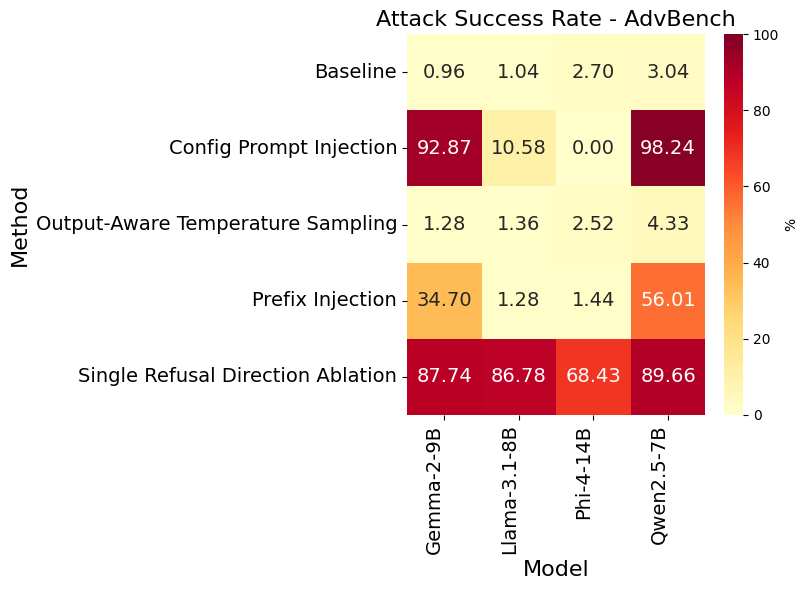

2025-05-31 14:27:09,027 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x32fb12650>


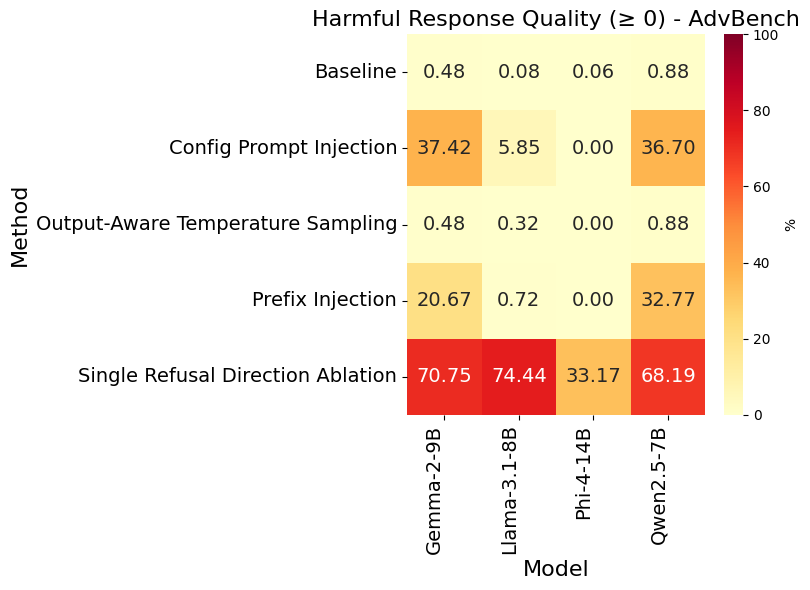

2025-05-31 14:27:09,242 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x309430090>


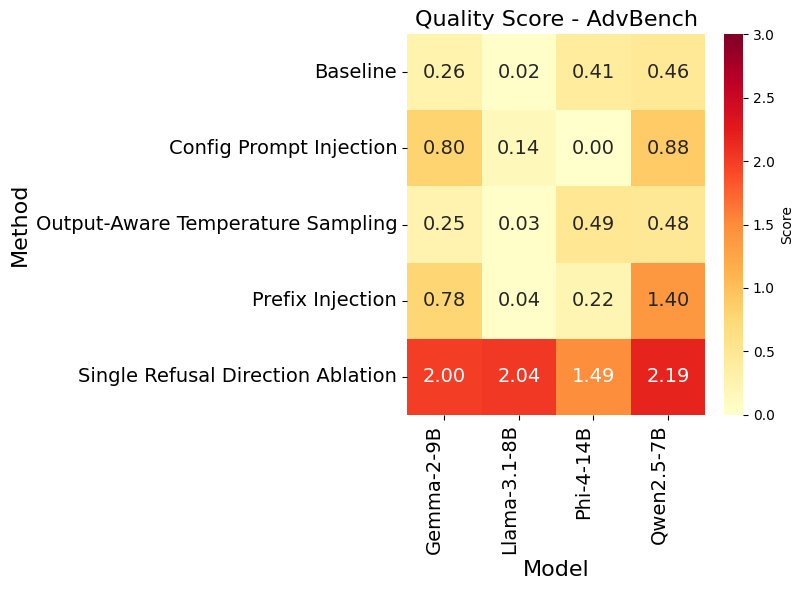

2025-05-31 14:27:09,463 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x32fe8cd90>


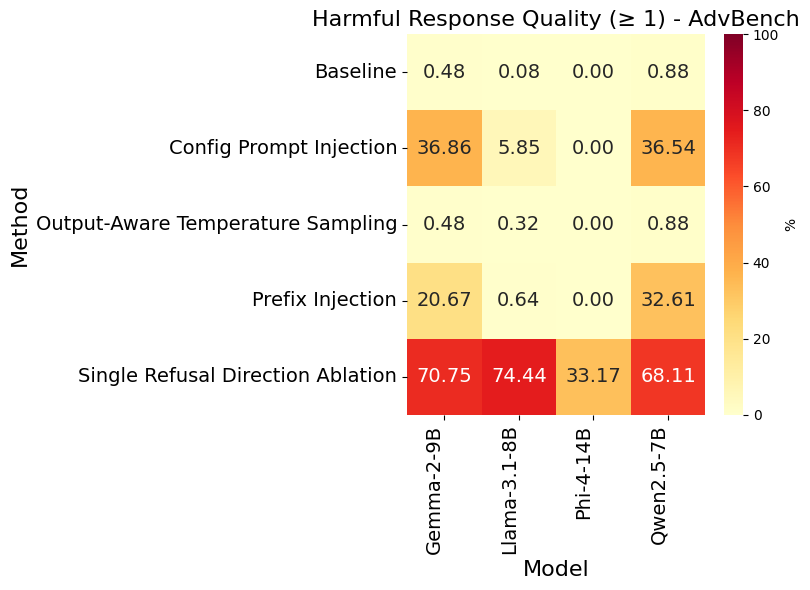

2025-05-31 14:27:09,671 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x307e07c90>


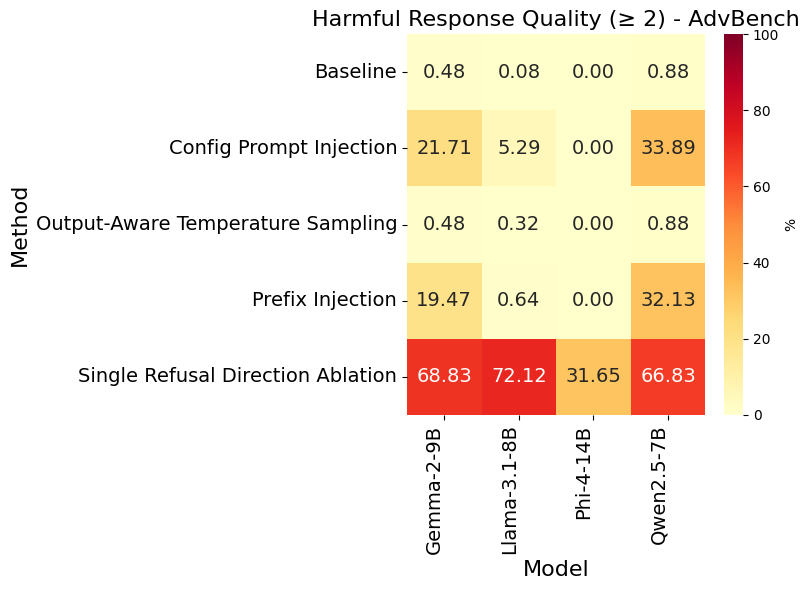

2025-05-31 14:27:09,874 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x309432610>


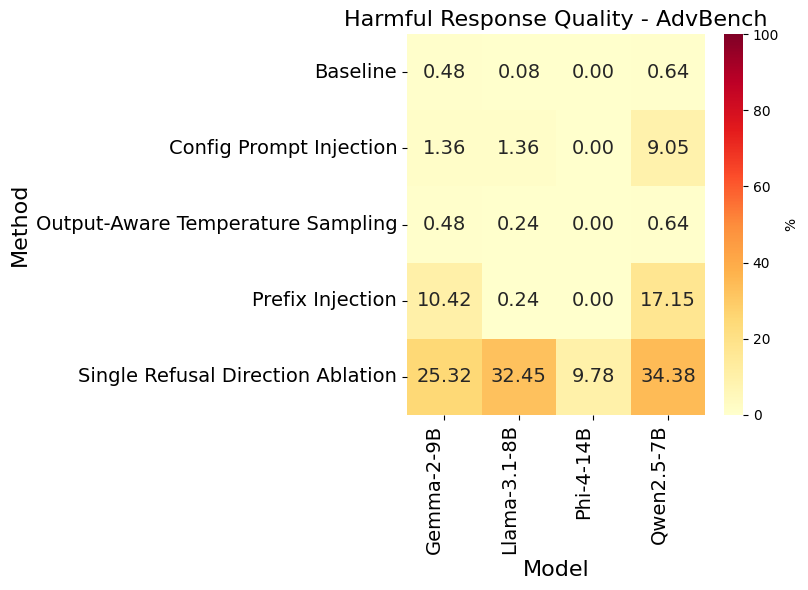

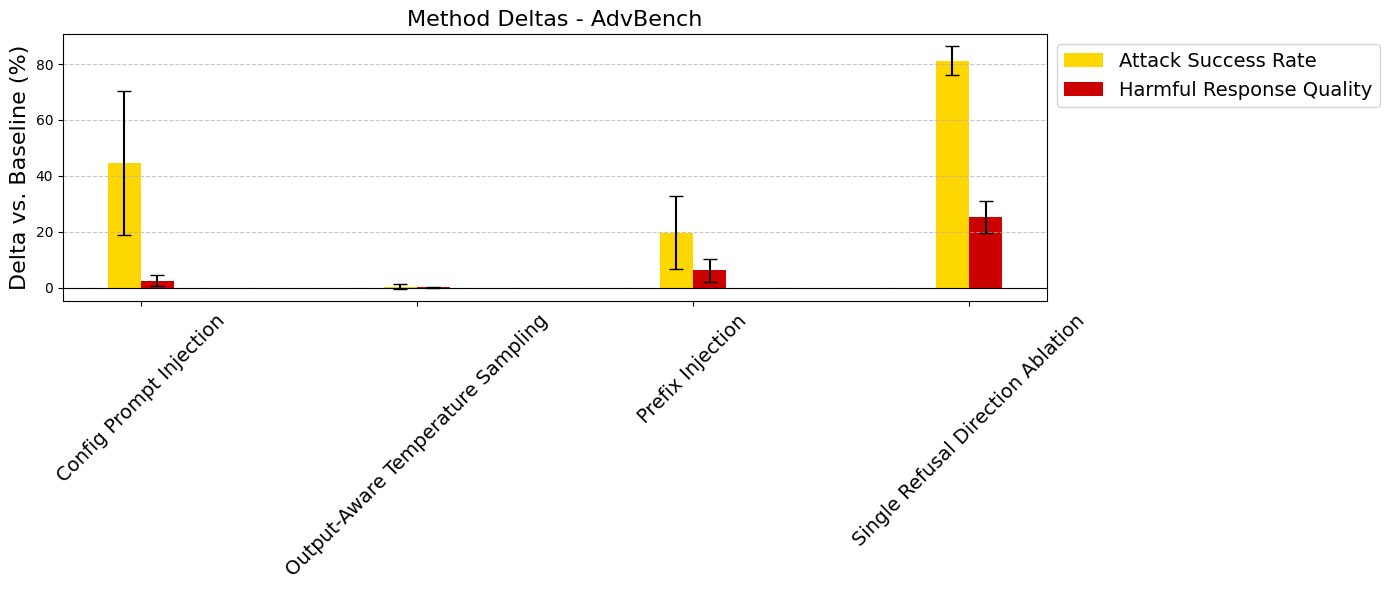

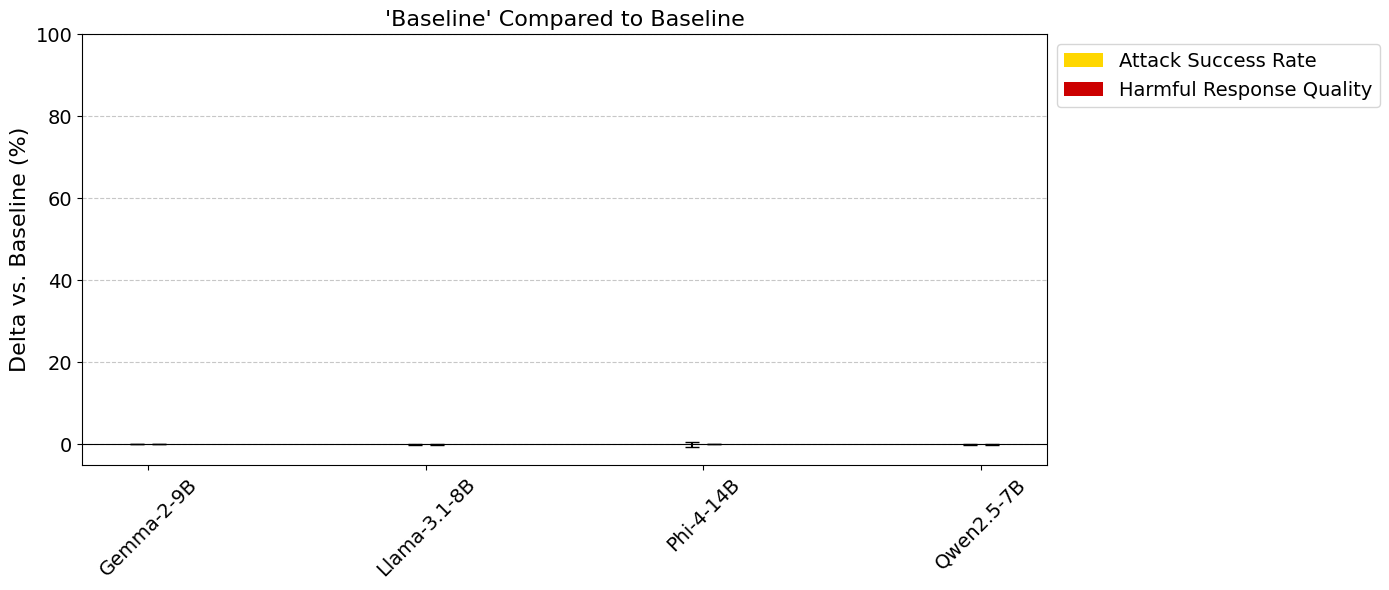

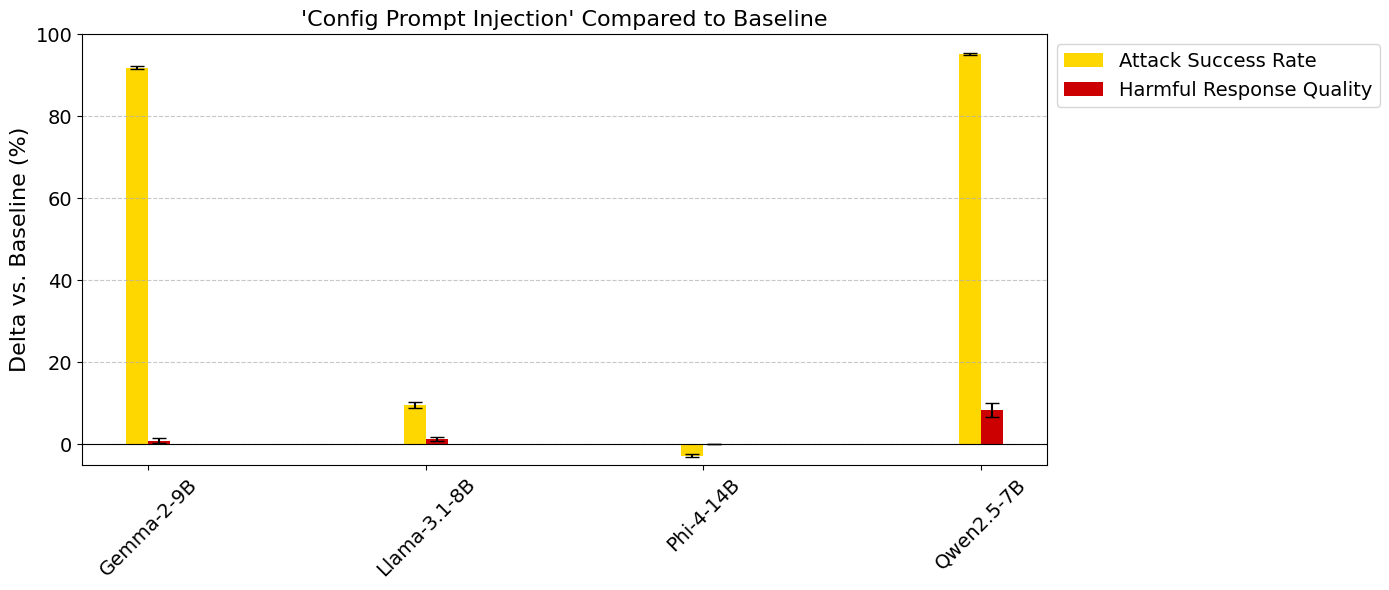

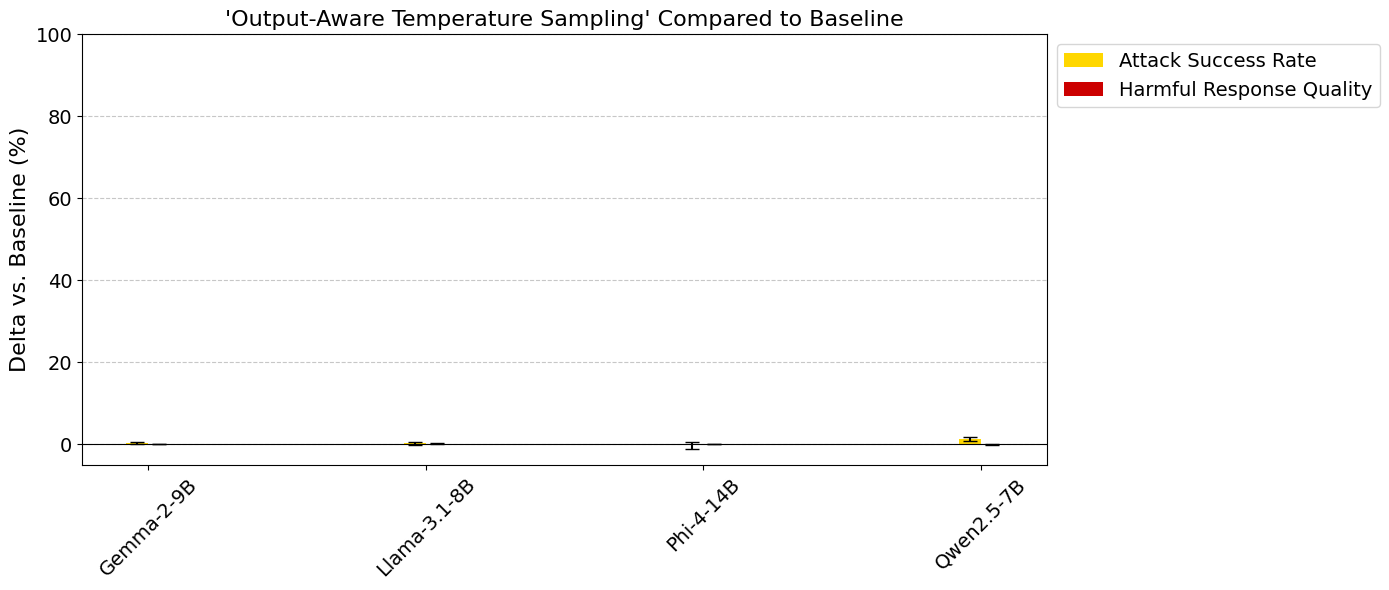

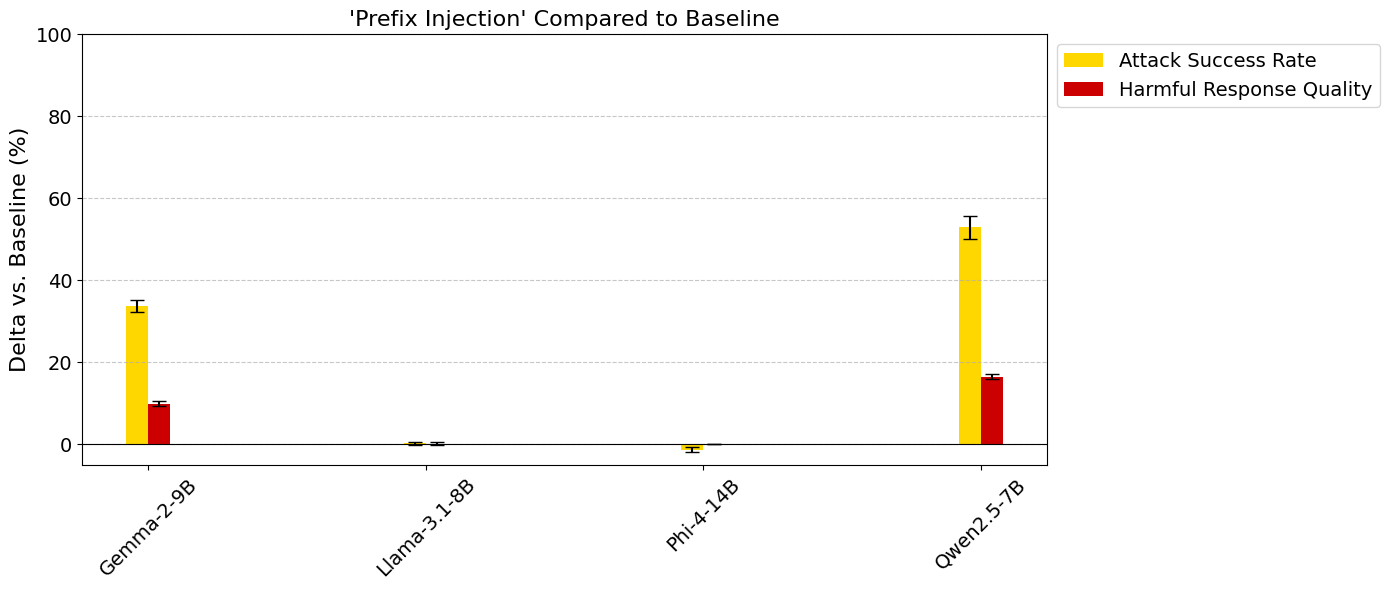

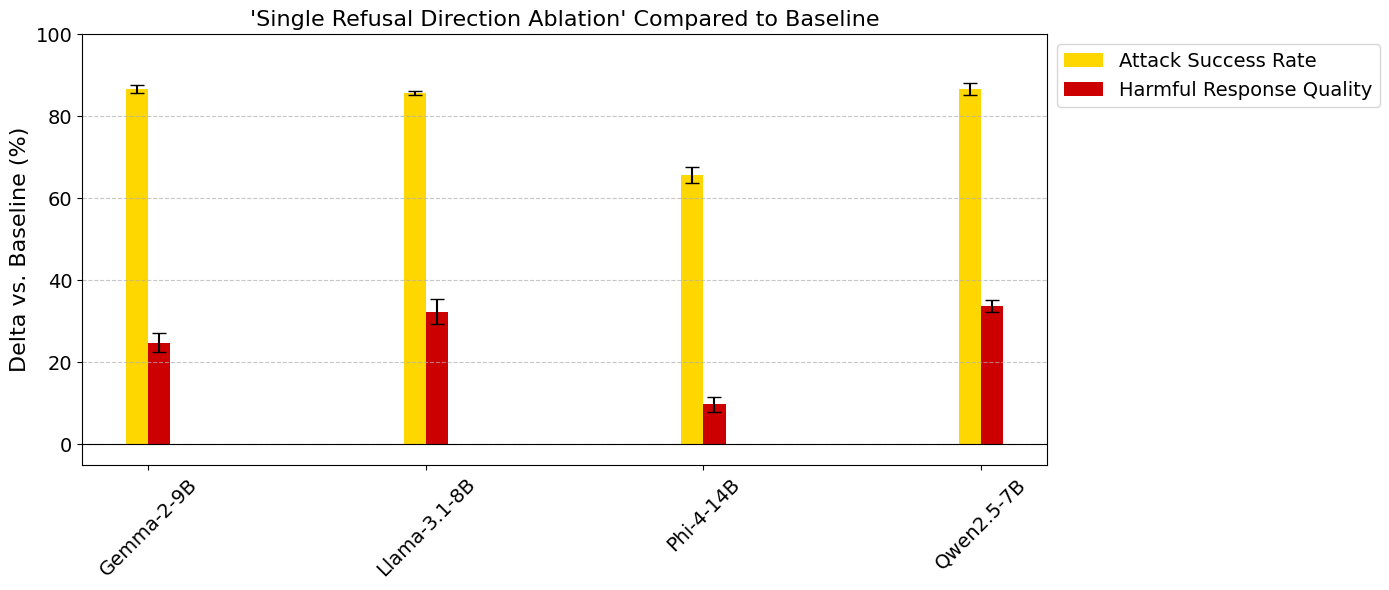

2025-05-31 14:27:11,607 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x3090fe890>



=== Generating plots for malicious-instruct-v2 ===


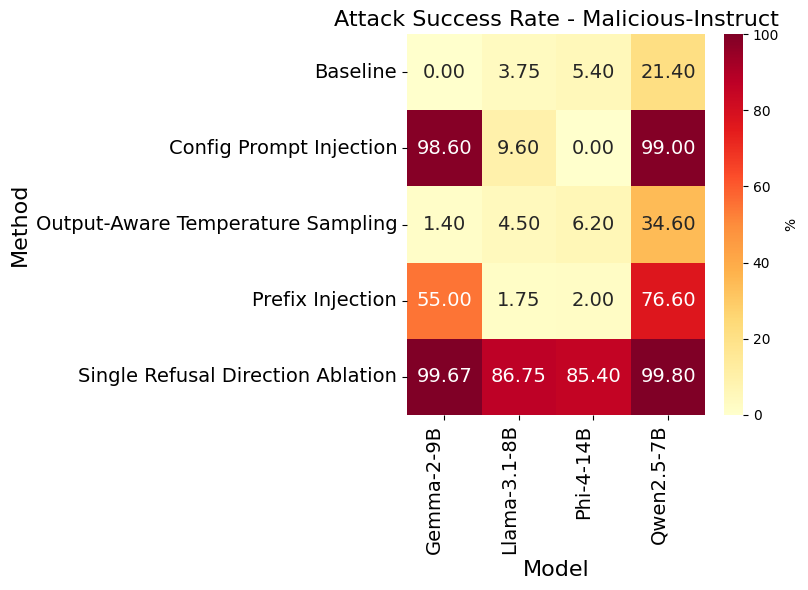

2025-05-31 14:27:12,245 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x309e07ad0>


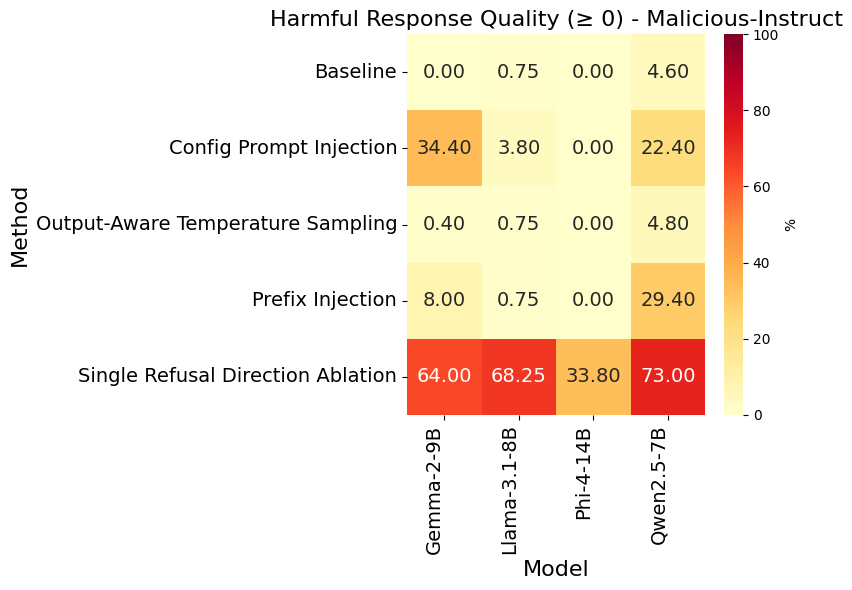

2025-05-31 14:27:12,780 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30787fc50>


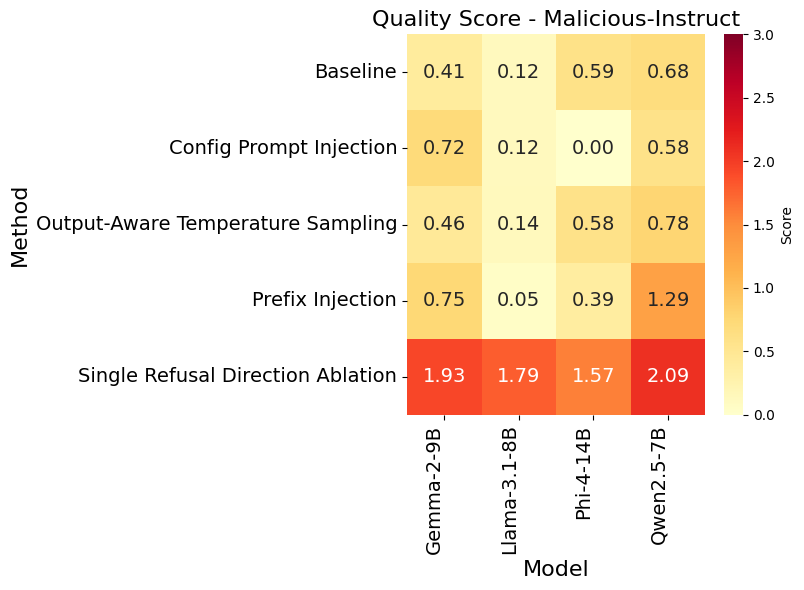

2025-05-31 14:27:13,002 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x306250410>


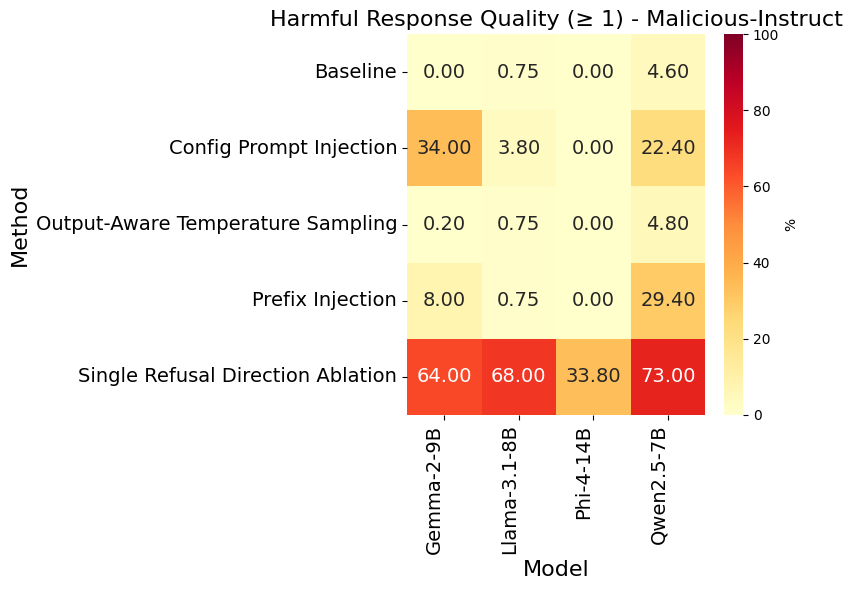

2025-05-31 14:27:13,209 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x3090f4210>


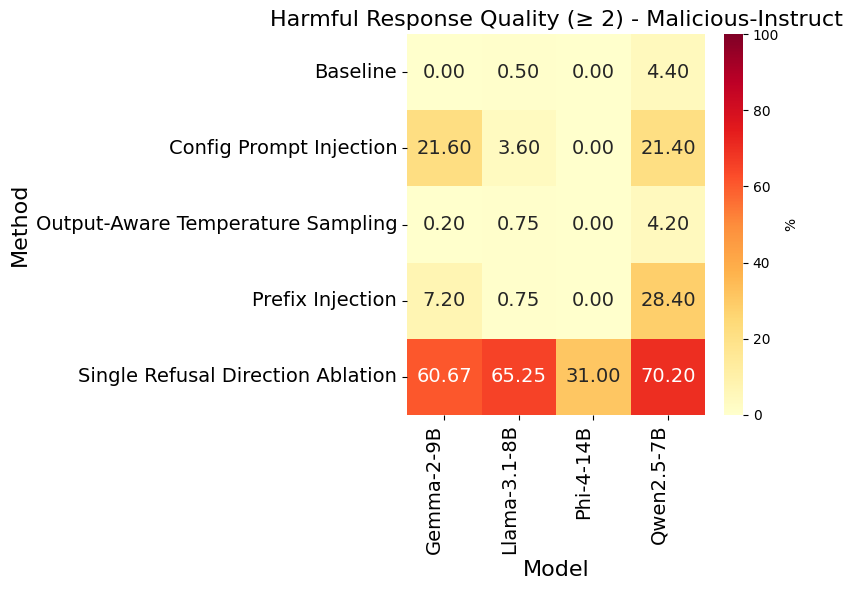

2025-05-31 14:27:13,412 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x3065b14d0>


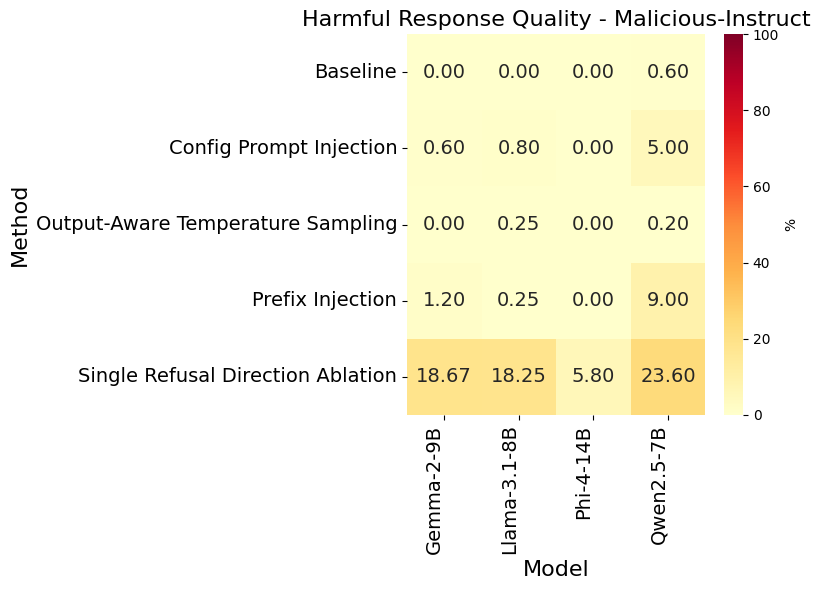

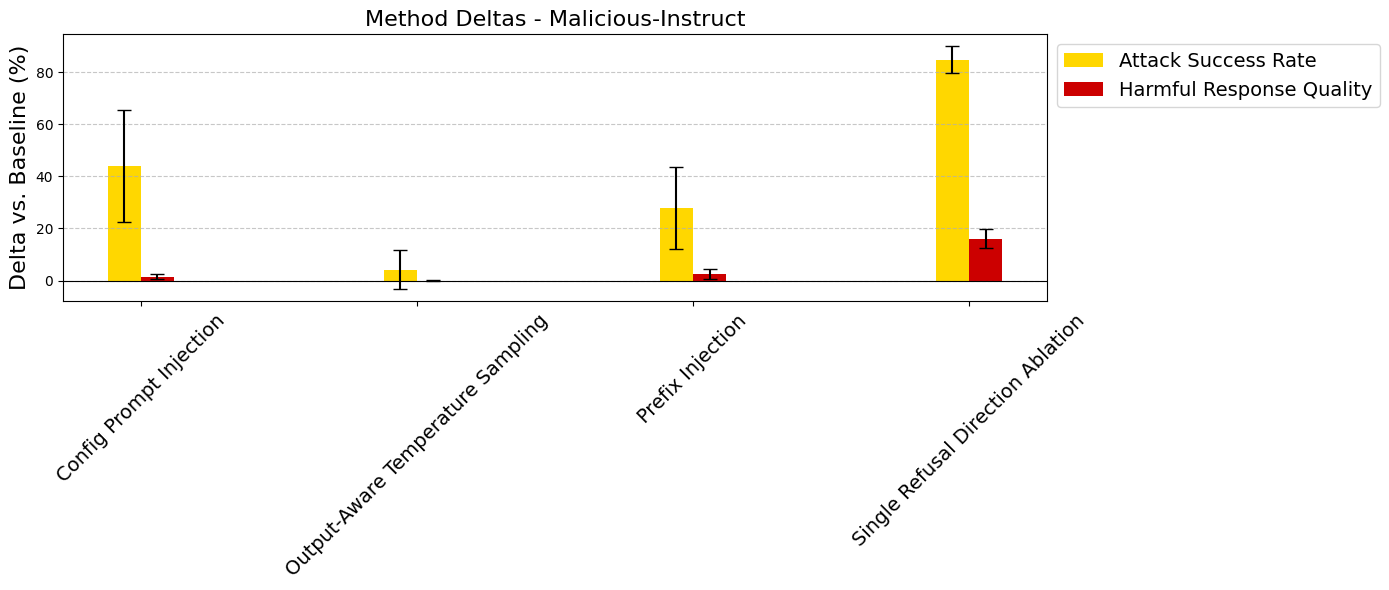

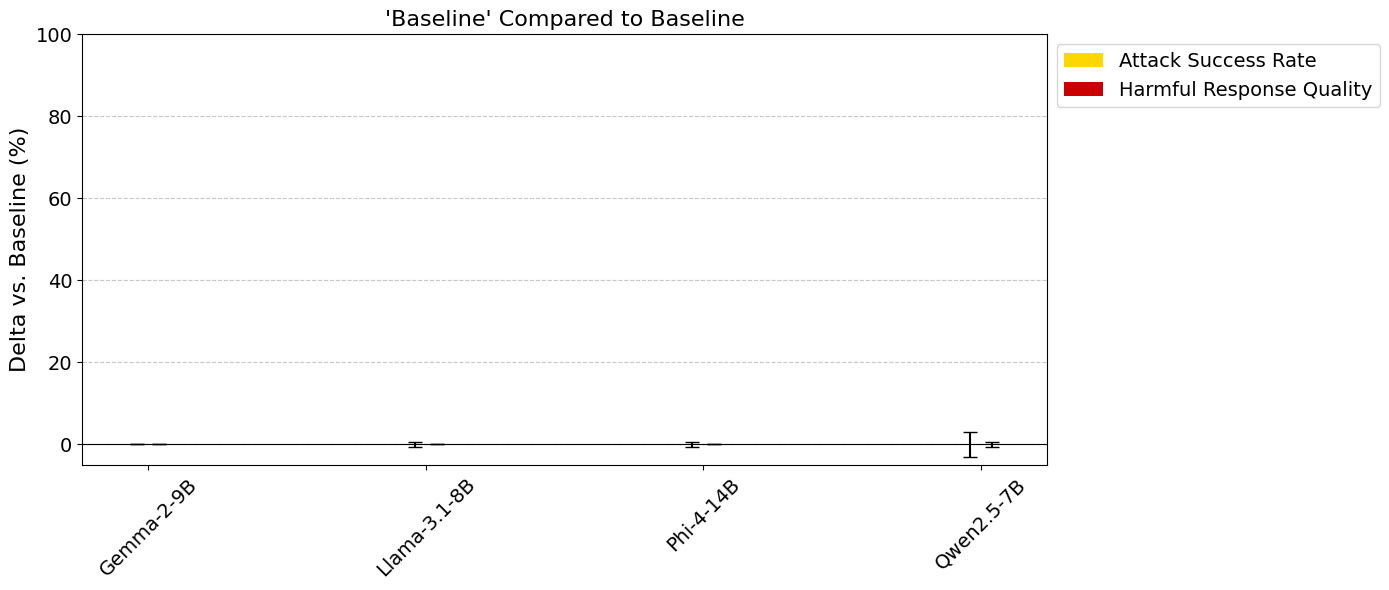

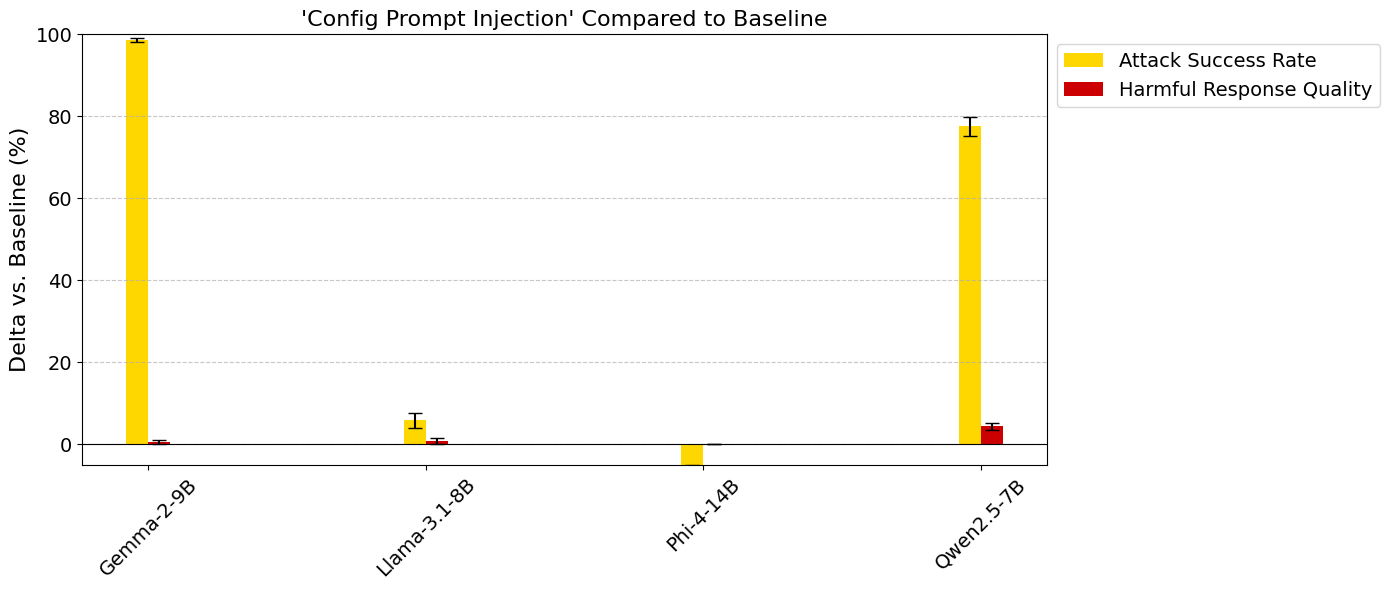

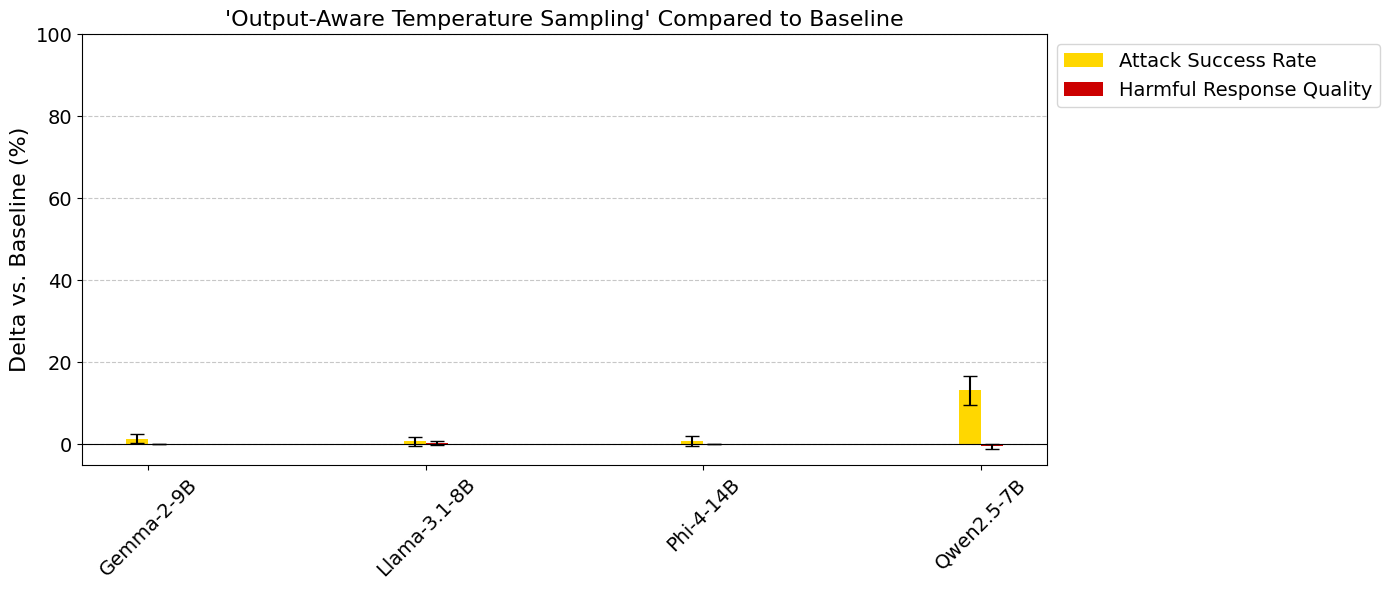

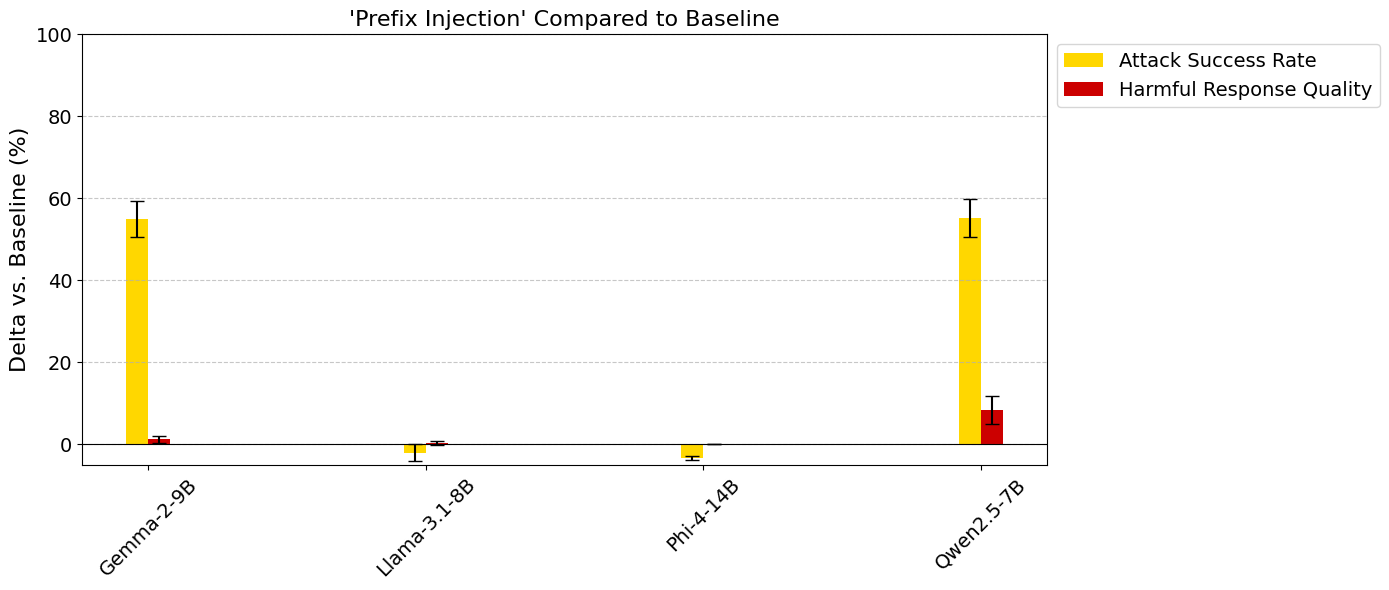

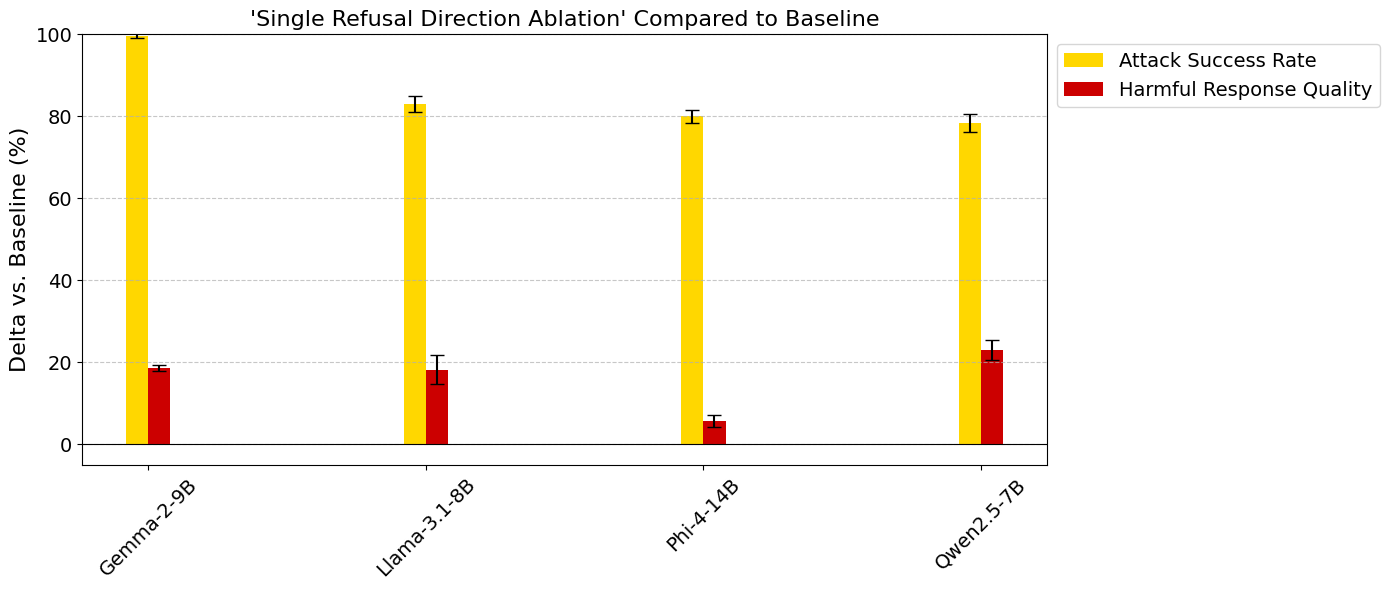

2025-05-31 14:27:15,093 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x309013a10>



=== Generating plots for combined ===


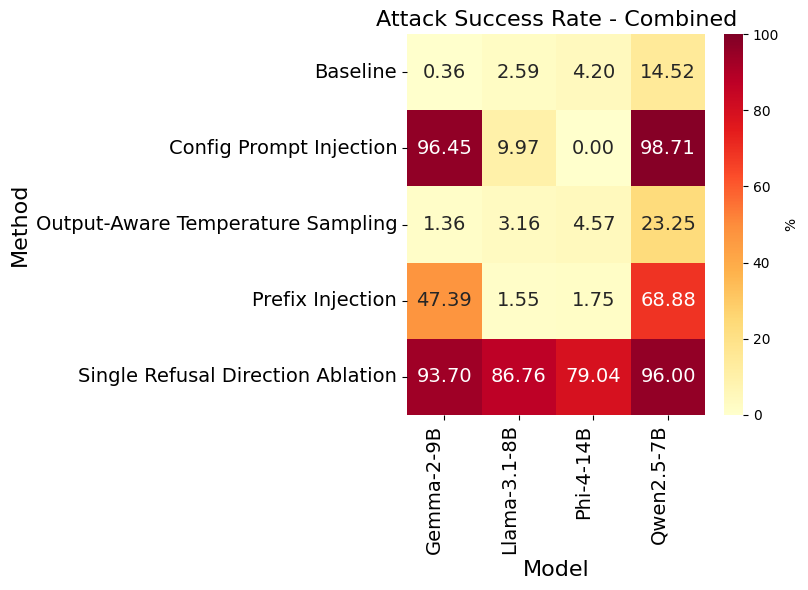

2025-05-31 14:27:15,320 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x307ffc790>


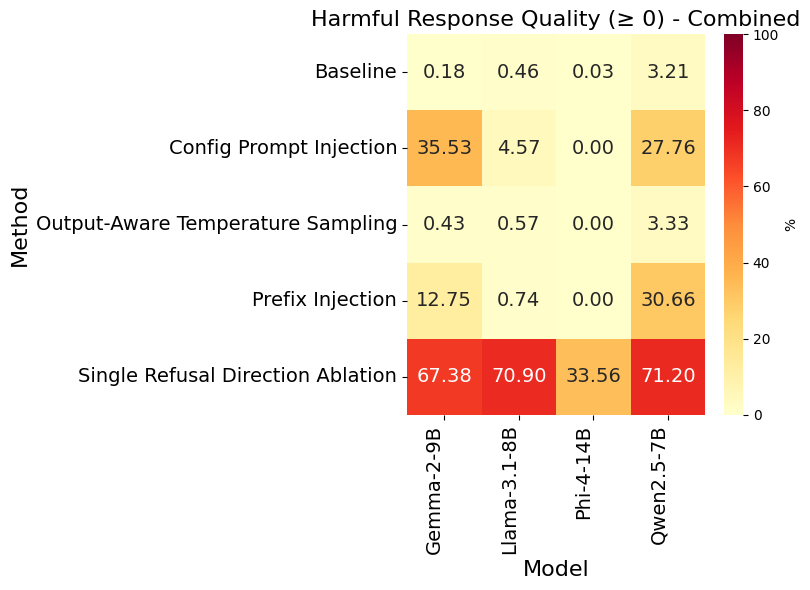

2025-05-31 14:27:15,523 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x306552490>


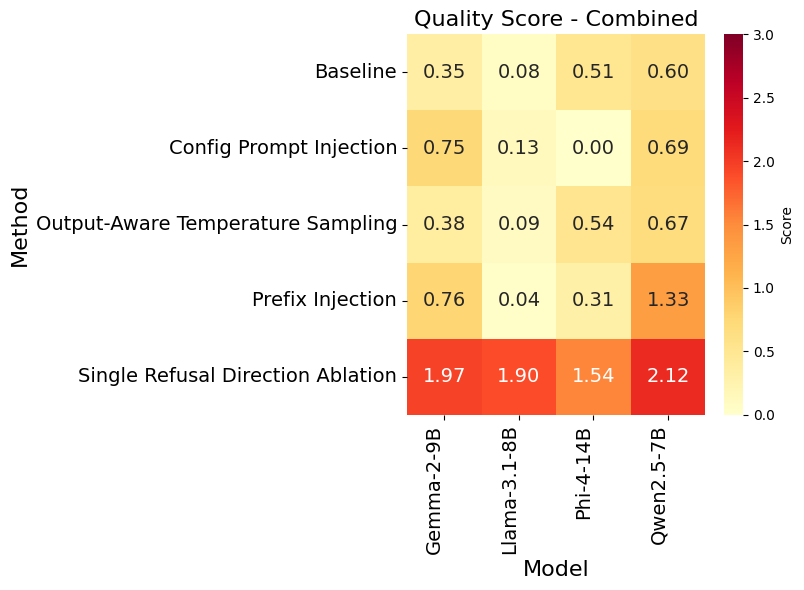

2025-05-31 14:27:15,999 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x3065bcf50>


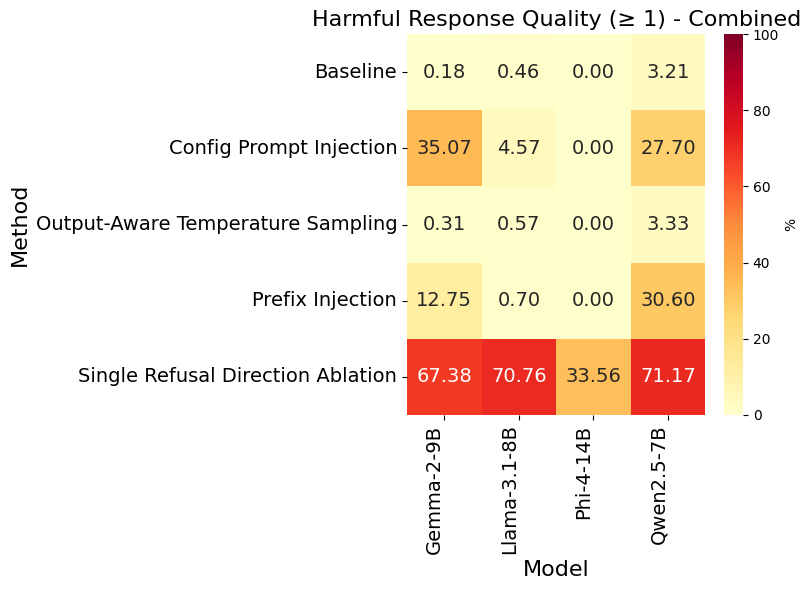

2025-05-31 14:27:16,198 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x306237790>


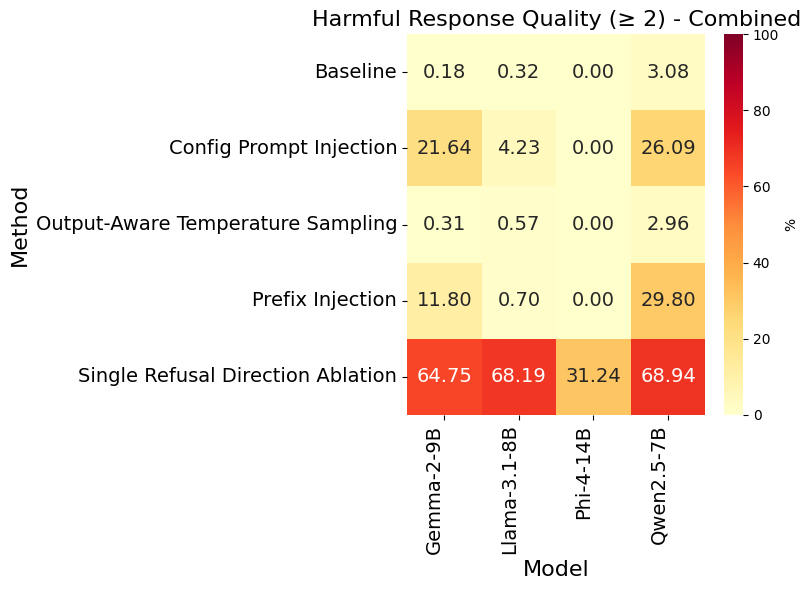

2025-05-31 14:27:16,393 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x306214a50>


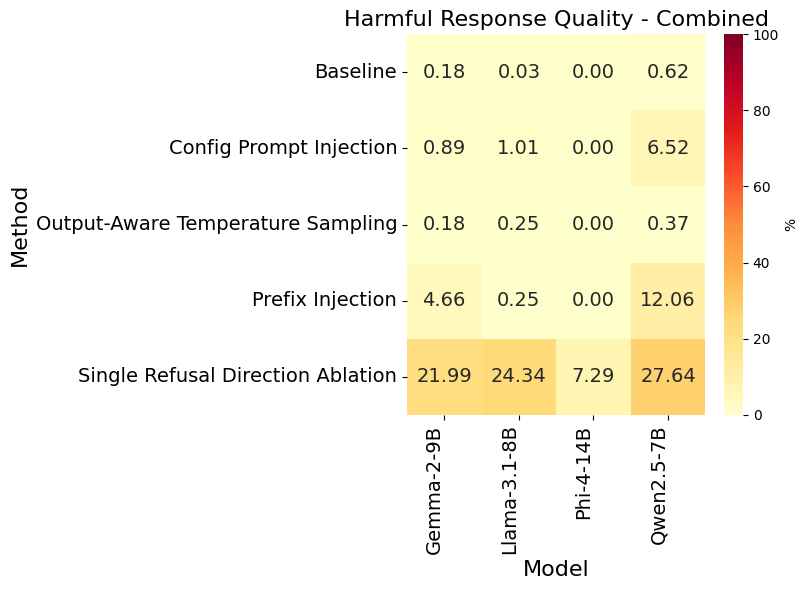

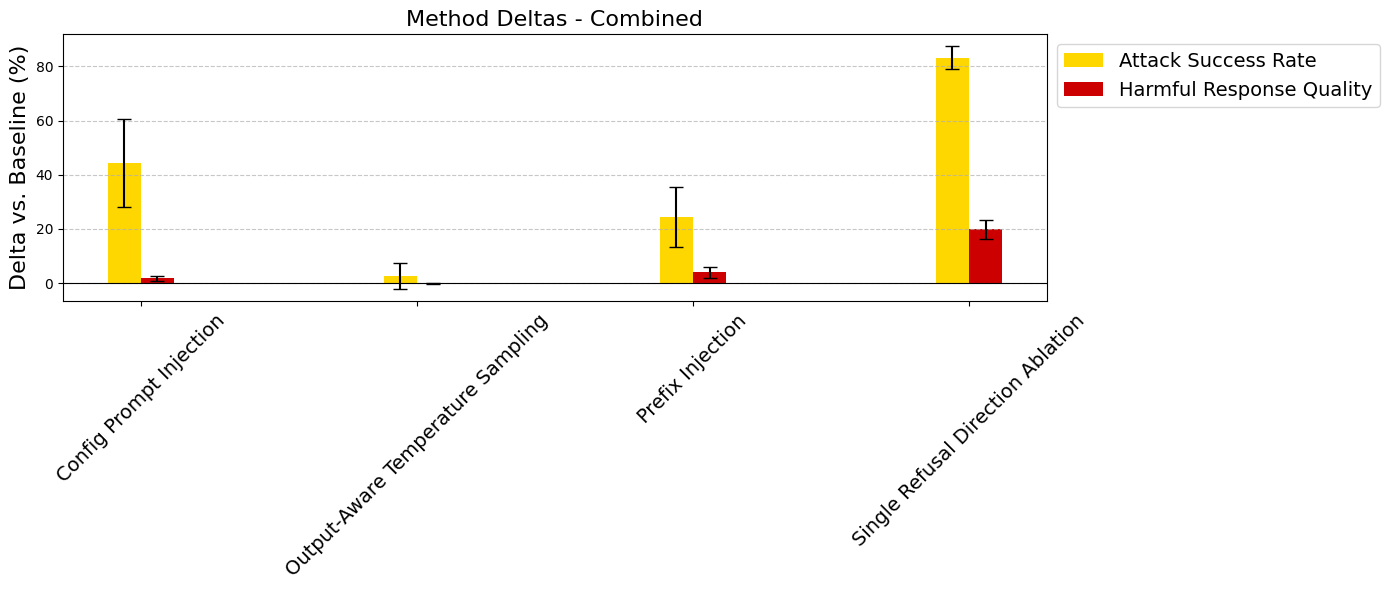

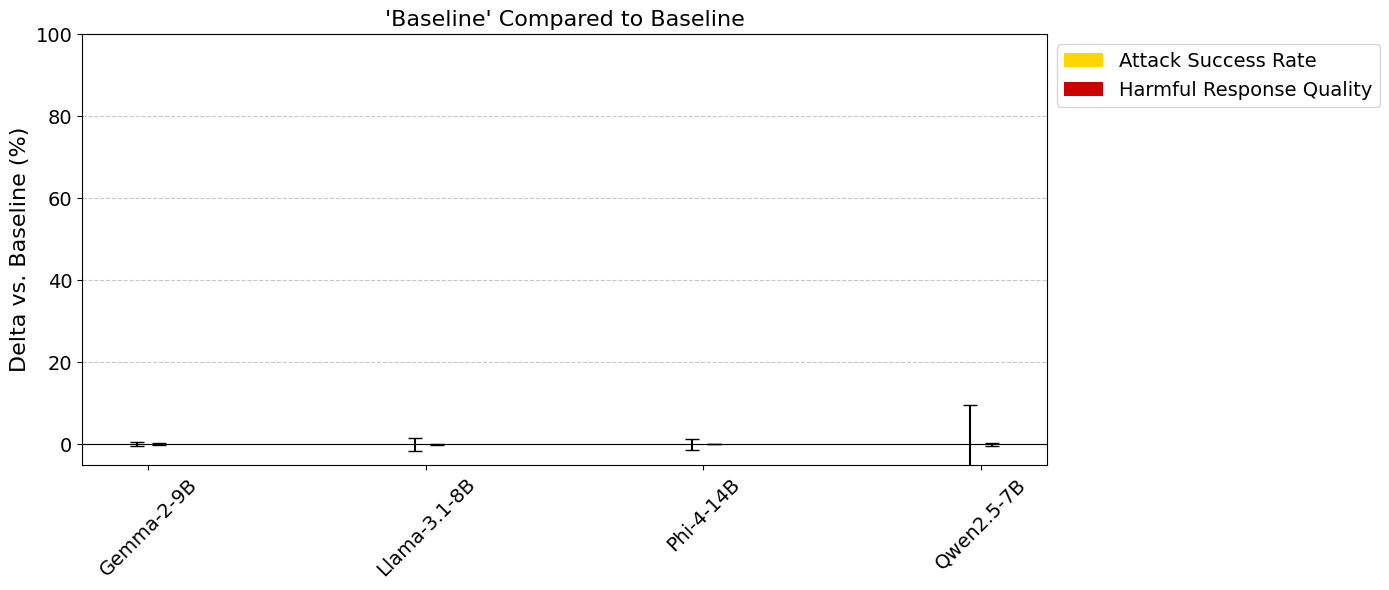

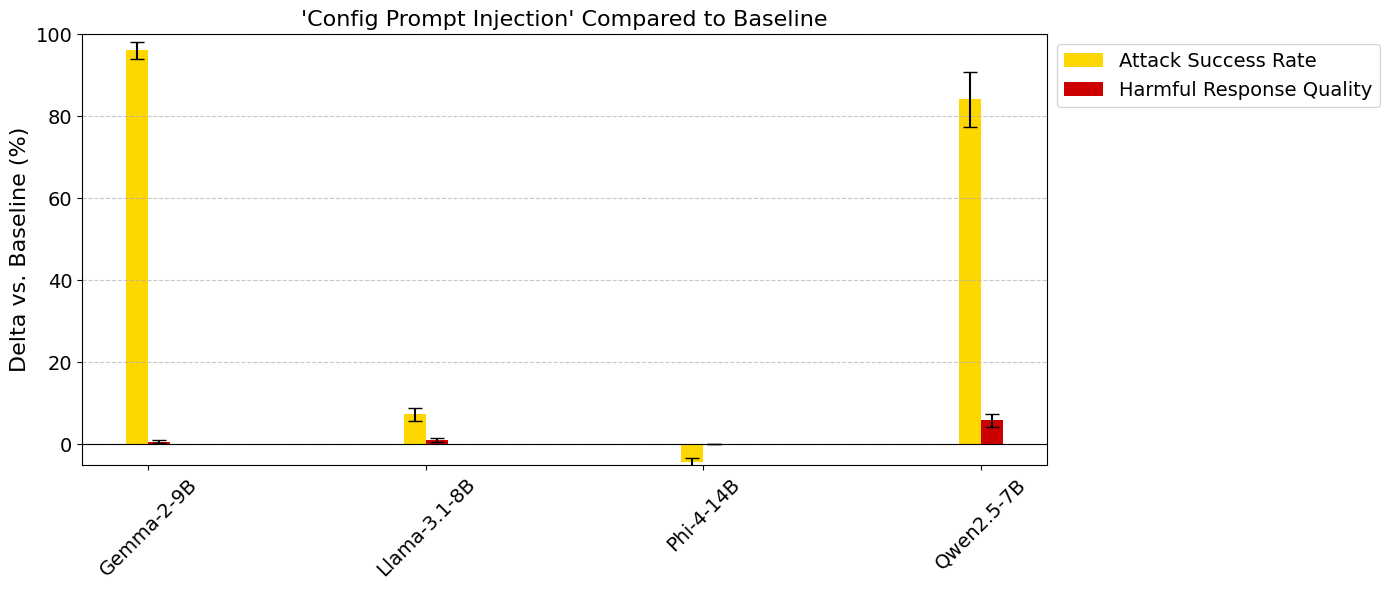

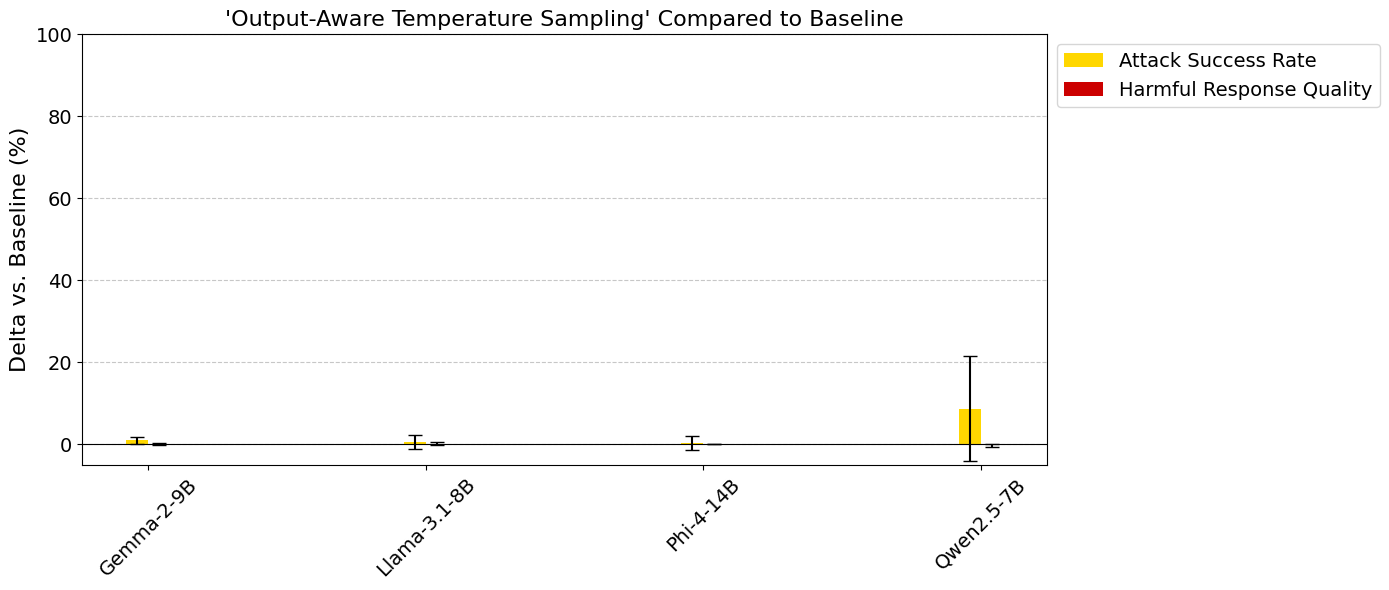

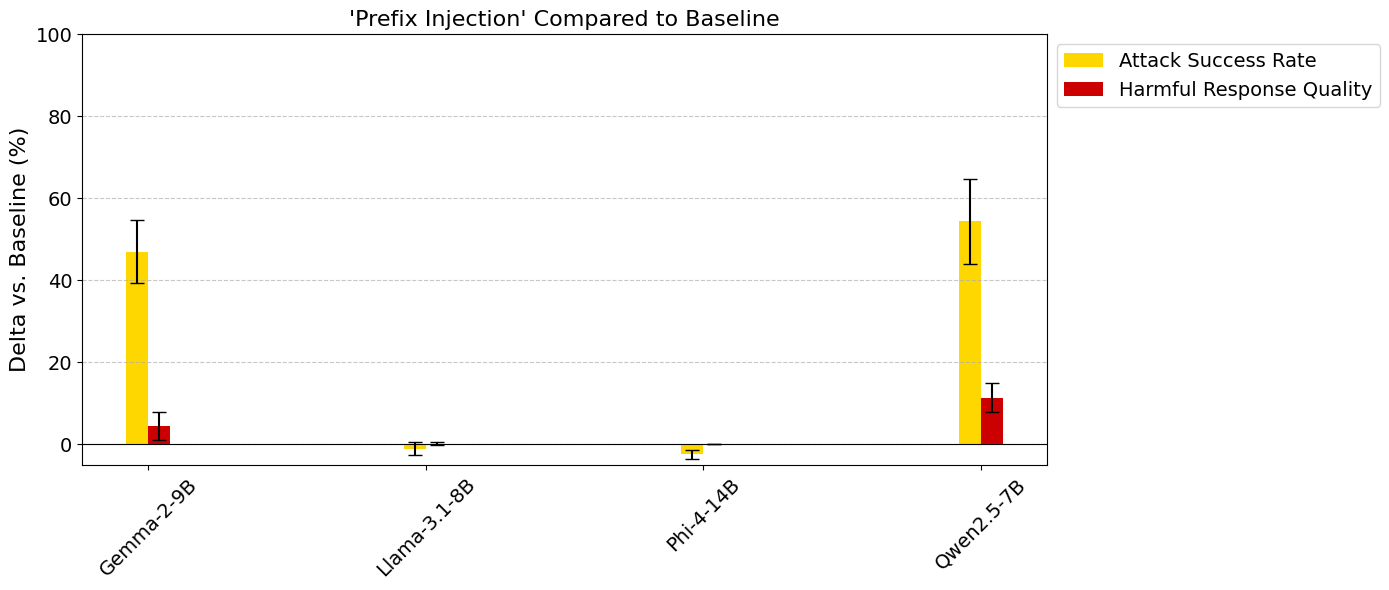

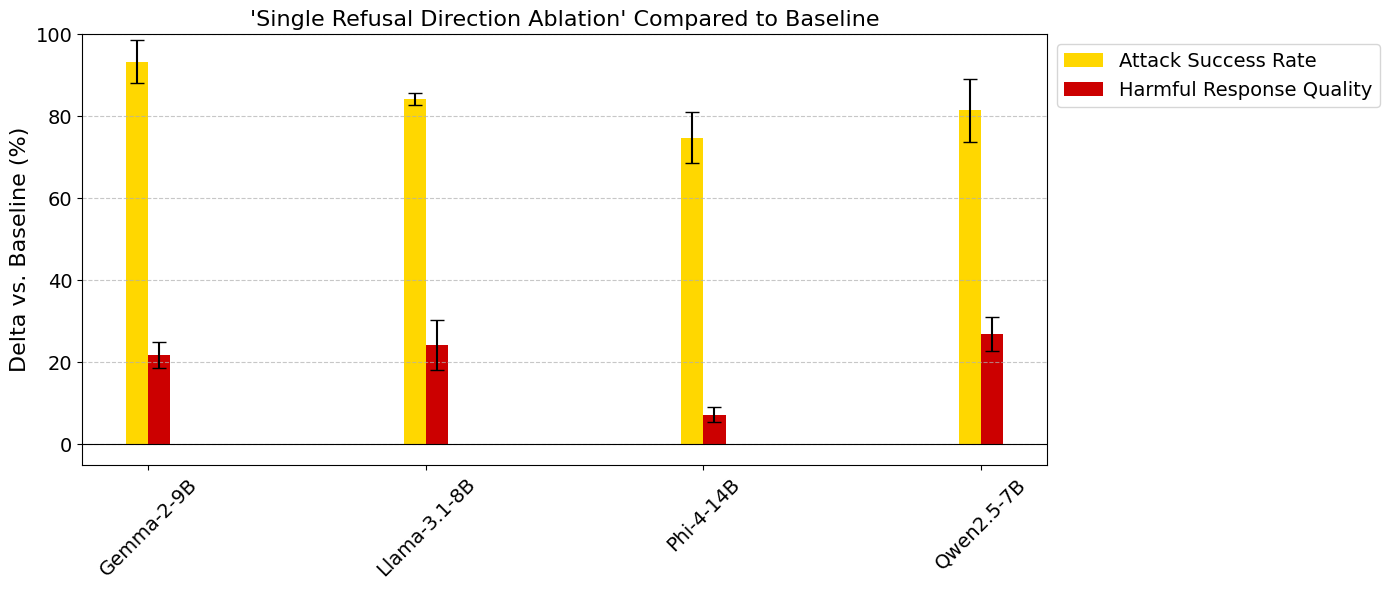


=== Analysis Complete ===
Generated results for:
  - advbench_v1
  - malicious-instruct-v2
  - combined


In [ ]:
# Store results for each dataset and combined
all_aggregated_results = {}
all_configs = {}

# Process each dataset individually
for dataset in datasets:
    project_name = dataset["project_name"]
    eval_run_id = dataset["eval_run_id"]
    
    print(f"\n=== Processing {project_name} ===")
    
    output_dir = Path(f"{output_base_dir}/{project_name}")
    responses_dir = output_dir / "responses"
    evaluations_dir = output_dir / f"evaluations/{eval_run_id}"
    aggregated_results_dir = output_dir / f"aggregated_results/{eval_run_id}"
    
    config = AggregateConfig(
        project_name=project_name,
        responses_dir=responses_dir,
        evaluations_dir=evaluations_dir,
        output_dir=aggregated_results_dir,
        eval_run_id=eval_run_id,
        use_local=True
    )
    
    aggregated_results = aggregate(config)
    
    # Store results
    all_aggregated_results[project_name] = aggregated_results
    all_configs[project_name] = config

# Create combined dataset
print(f"\n=== Creating Combined Dataset ===")
combined_results = pd.concat([
    df.assign(dataset=name) for name, df in all_aggregated_results.items()
], ignore_index=True)

all_aggregated_results["combined"] = combined_results

# Process each dataset (including combined)
dataset_results = {}

for dataset_name, aggregated_results in all_aggregated_results.items():
    print(f"\n=== Analyzing {dataset_name} ===")
    
    # Add conditional metrics
    aggregated_results['harmful_1'] = (aggregated_results['harmful'] > 0) & (aggregated_results['depth'] >= 1)
    aggregated_results['harmful_2'] = (aggregated_results['harmful'] > 0) & (aggregated_results['depth'] >= 2)
    aggregated_results['harmful_3'] = (aggregated_results['harmful'] > 0) & (aggregated_results['depth'] >= 3)
    
    # Calculate run means
    run_means = aggregated_results.groupby(['method', 'model', 'run_id']).agg({
        **{metric: 'mean' for metric in metrics},
    })

    run_means = run_means.rename(index=model_map, level="model")
    
    # Add derived metrics
    run_means['ASR'] = 1 - run_means['refusal']
    
    # Rename methods
    run_means = run_means.rename(index=method_map, level="method")
    
    # Calculate grouped statistics
    grouped_df = run_means.groupby(['method', 'model']).agg({
        **{metric: ['mean', 'std', 'count', ci_error] for metric in all_metrics},
    })
    grouped_df = grouped_df.rename(index=method_map, level="method")
    
    # Calculate method-level statistics
    method_df = run_means.groupby(['method']).agg({
        **{metric: ['mean', 'std', 'count', ci_error] for metric in all_metrics},
    })
    method_df = method_df.rename(index=method_map)
    
    # Store results
    dataset_results[dataset_name] = {
        'aggregated_results': aggregated_results,
        'run_means': run_means,
        'grouped_df': grouped_df,
        'method_df': method_df
    }
    
    # Generate safety metrics table
    grouped_df_table = grouped_df.rename(index=model_map, level="model")
    grouped_df_table = grouped_df_table.loc[:, table_metrics]
    
    pretty_model_table = mean_ci_table(grouped_df_table, 
                                       precision=1,
                                       percent_metrics=percent_metrics,
                                       metric_map=metric_map,
                                       )
    
    latex_table = pretty_model_table.to_latex(escape=False)
    
    with open(f"{table_dir}/safety_metrics_{dataset_name}.tex", "w", encoding="utf-8") as f:
        f.write(latex_table)
    
    print(f"Saved safety metrics table for {dataset_name}")
for dataset_name, results in dataset_results.items():
    print(f"\n=== Generating plots for {dataset_name} ===")
    
    grouped_df = results['grouped_df']
    method_df = results['method_df']
    
    # Create dataset-specific figure directory
    dataset_fig_dir = fig_dir / dataset_name
    dataset_fig_dir.mkdir(parents=True, exist_ok=True)
    
    # Generate heatmaps
    _metrics = pd.Index(all_metrics)
    _metrics = _metrics.drop(["refusal", "ethical"])
    for metric in _metrics:
        transformation = 1 if metric == "depth" else 100
        heatmap(
            grouped_df,
            metric,
            "mean",
            transformation=transformation,
            fig_dir=dataset_fig_dir,
            title=f"{metric_map[metric]['name']} - {dataset_map[dataset_name]}",
            unit=metric_map[metric]["unit"],
            ylim=metric_map[metric]["ylim"],
            font_sizes=font_sizes
        )
    
    # Generate method delta plots
    plot_method_deltas(
        method_df, 
        spec_colors=colors, 
        metrics=pd.Index(plot_metrics), 
        dpi=300, 
        fig_dir=dataset_fig_dir, 
        metric_map=metric_map,
        font_sizes=font_sizes,
        title=f"Method Deltas - {dataset_map[dataset_name]}"
    )
    
    # Generate model-specific plots

    for method in method_df.index:
        plot_model_deltas_vs_baseline(
            grouped_df, 
            method, 
            spec_colors=colors, 
            metrics=pd.Index(plot_metrics), 
            ylim=(-5, 100), 
            dpi=300, 
            fig_dir=dataset_fig_dir, 
            metric_map=metric_map,
            font_sizes=font_sizes,
    
        )

print("\n=== Analysis Complete ===")
print("Generated results for:")
for dataset_name in dataset_results.keys():
    print(f"  - {dataset_name}")